In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# load the movie rating data into a dataframe
rating_header = ["user_id", "item_id", "rating", "timestamp"]
rating = pd.read_csv("./ml-100k/u.data", sep = '\t', header = None, names=rating_header)

In [3]:
rating.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user_id      100000 non-null int64
item_id      100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [5]:
# load the user data into a dataframe
user_header = ["user_id", "age", "gender", "occupation", "zip_code"]
users = pd.read_csv("./ml-100k/u.user", sep = '|', header = None, names=user_header)

In [6]:
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [7]:
users.loc[users['zip_code'] == 'T8H1N']

,user_id,age,gender,occupation,zip_code
73,74,39,M,scientist,T8H1N
633,634,39,M,engineer,T8H1N


In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user_id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 36.9+ KB


In [9]:
# load movie data into a dataframe
movie_header = ["item_id", "title", "release_date", "video_release_date", "IMDb_URL",
         "unknown", "Action", "Adventure", "Animation","Children's", "Comedy", "Crime",
         "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", 
         "Romance", "Sci-Fi", "Thriller", "War", "Western"]
movies = pd.read_csv("./ml-100k/u.item", sep = '|', header = None, encoding = 'latin1', names = movie_header)

In [10]:
# remove the video release date (no values)
movies = movies.drop(columns=['video_release_date'])
movies.head()

,item_id,title,release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [11]:

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 23 columns):
item_id         1682 non-null int64
title           1682 non-null object
release_date    1681 non-null object
IMDb_URL        1679 non-null object
unknown         1682 non-null int64
Action          1682 non-null int64
Adventure       1682 non-null int64
Animation       1682 non-null int64
Children's      1682 non-null int64
Comedy          1682 non-null int64
Crime           1682 non-null int64
Documentary     1682 non-null int64
Drama           1682 non-null int64
Fantasy         1682 non-null int64
Film-Noir       1682 non-null int64
Horror          1682 non-null int64
Musical         1682 non-null int64
Mystery         1682 non-null int64
Romance         1682 non-null int64
Sci-Fi          1682 non-null int64
Thriller        1682 non-null int64
War             1682 non-null int64
Western         1682 non-null int64
dtypes: int64(20), object(3)
memory usage: 302.3+ KB


# Data Transformation and Combination
Some ML approaches expect the data set with numerical values only, the following codes show how to convert catergorical data into numbers

In [12]:
# transfrom the users dataframe with numerical values (excluding zip_code)
users_num = users.copy()
users_num["gender"].replace(['F', 'M'],[0, 1], inplace=True) # replace F and M with 0 and 1, respectively

In [13]:
occupation = pd.read_csv("./ml-100k/u.occupation", header = None)
occupation_list = occupation.values
users_num["occupation"].replace(occupation_list,list(range(0, len(occupation_list))), inplace=True)
users_num.head()

,user_id,age,gender,occupation,zip_code
0,1,24,1,19,85711
1,2,53,0,13,94043
2,3,23,1,20,32067
3,4,24,1,19,43537
4,5,33,0,13,15213


In [14]:
# data aggregation
average_rating = rating[["item_id", "rating"]].groupby("item_id", as_index=False).mean()  # average rating per movie
average_rating.sort_values("rating",ascending=False).head()

,item_id,rating
813,814,5.0
1598,1599,5.0
1200,1201,5.0
1121,1122,5.0
1652,1653,5.0


In [15]:
# merge two dataframes (average_rating and movies)
pd.merge(average_rating, movies[["item_id", "title"]])

,item_id,rating,title
0,1,3.878319,Toy Story (1995)
1,2,3.206107,GoldenEye (1995)
2,3,3.033333,Four Rooms (1995)
3,4,3.550239,Get Shorty (1995)
4,5,3.302326,Copycat (1995)
5,6,3.576923,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6,7,3.798469,Twelve Monkeys (1995)
7,8,3.995434,Babe (1995)
8,9,3.896321,Dead Man Walking (1995)
9,10,3.831461,Richard III (1995)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8a156ce10>]],
      dtype=object)

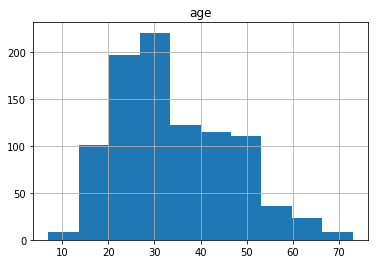

In [16]:
# age intervals distrubution
users.hist(column="age")
#users["age_category"] = pd.cut(users["age"], bins = [0, 10, 20, 30, 40, 50, 60, 70, 80], labels=[5, 15, 25, 35, 45, 55, 65, 75])
#users["age_category"].hist()

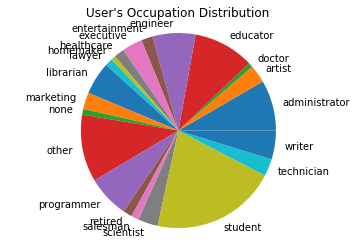

In [17]:
# occupation distrubution
occupation_count = users[["user_id", "occupation"]].groupby("occupation", as_index=False).size()  # count the numbers
plt.pie(occupation_count, labels=occupation_count.index.tolist())
plt.title("User's Occupation Distribution")
plt.axis("equal")
plt.show()

<BarContainer object of 2 artists>

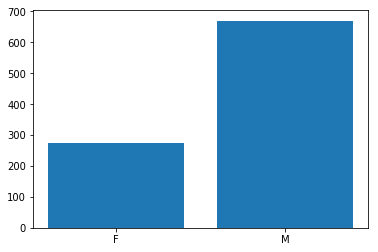

In [18]:
gender_count = users[["user_id", "gender"]].groupby("gender", as_index=False).size()
# print(gender_count.)
plt.bar(gender_count.index.tolist(),gender_count)

In [19]:

# Clustering the movies by genre
genre = pd.read_csv("./ml-100k/u.genre", sep = '|', header = None)
genre_list = genre[0].values
movie_set_genre = movies[genre_list]

In [20]:
from sklearn.cluster import KMeans
k = 50
kmeans = KMeans(n_clusters=k)
kmeans.fit_predict(movie_set_genre)


array([19, 30,  2, ..., 11,  8,  1], dtype=int32)

In [21]:

kmeans.inertia_

308.8703479639322

In [22]:
# compute the similarity between two movies
import scipy.spatial.distance as sp_dist
genre_array = movie_set_genre.to_numpy()

x = genre_array[0]
y = genre_array[1]
print(sp_dist.cosine(x,y))
print(sp_dist.euclidean(x,y))
print(sp_dist.jaccard(x,y))

1.0
2.449489742783178
1.0


In [23]:
# compute the matrix of all pairwise distances of movies
import sklearn.metrics as metrics

distance_matrix = metrics.pairwise_distances(genre_array,metric = 'cosine') # ‘cosine’, ‘euclidean’, etc
print(distance_matrix)

[[0.         1.         1.         ... 1.         0.42264973 1.        ]
 [1.         0.         0.42264973 ... 1.         1.         1.        ]
 [1.         0.42264973 0.         ... 1.         1.         1.        ]
 ...
 [1.         1.         1.         ... 0.         1.         0.29289322]
 [0.42264973 1.         1.         ... 1.         0.         1.        ]
 [1.         1.         1.         ... 0.29289322 1.         0.        ]]


In [25]:
# cosine_sim = cosine_similarity(distance_matrix)
# print(cosine_sim)
# similarity_df  =  pd.DataFrame(cosine_sim) 
# import numpy as np
# import pandas as pd
# from sklearn.metrics.pairwise import cosine_similarity

# df = pd.DataFrame(np.random.normal(0, 1, (10, 10)))
# similarity_df = pd.DataFrame(cosine_similarity(df))
# print(similarity_df)

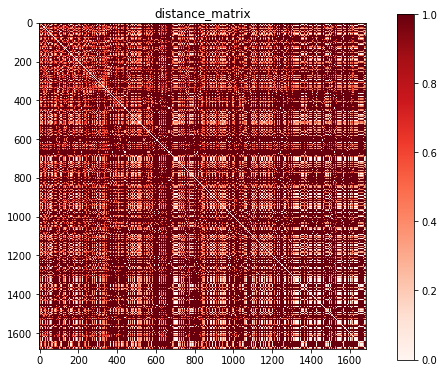

In [24]:
fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(111)
ax.set_title('distance_matrix')
plt.imshow(distance_matrix,cmap='Reds')
ax.set_aspect('equal')

cax = fig.add_axes([0.3, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()